In [1]:
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

%matplotlib inline

#Scaler
from sklearn.preprocessing import StandardScaler
#data split
from sklearn.model_selection import train_test_split#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz
import graphviz

#주성분 분석
from sklearn.decomposition import PCA
import statsmodels.api as sm


#회귀 분석
from sklearn.linear_model import LinearRegression
#후진제거법
from sklearn.feature_selection import RFE

#예측
#예측/회귀 Decision tree
from sklearn.tree import DecisionTreeRegressor
#예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
#예측/회귀 Gradient
from sklearn.ensemble import GradientBoostingRegressor
#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
#회귀분석
from statsmodels.formula.api import ols
#선형모델 formula(y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score#분류
#로지스틱 회귀
from statsmodels.api import Logit
#의사결정나무
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
#그래디언트부스트
from sklearn.ensemble import GradientBoostingClassifier
#엑스지부스트
from xgboost import XGBClassifier
from xgboost import plot_importance
#SVM
from sklearn.svm import SVC
#분류 NN (MLP)
from sklearn.neural_network import MLPClassifier
#KNN 분류
from sklearn.neighbors import KNeighborsClassifier#분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc#사용할 함수 선언#RSME: root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))#MAPE: mean absolutre percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100#XG Boost에서 사용할 정확도 표현 함수
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precesion = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬 \n',confusion, '\n')
    print('정확도: ', accuracy)
    print('정밀도: ', precesion)
    print('재현율: ', recall)
    print('F1: ', F1)
    print('AUC: ', AUC)#for ignoring warning
import warnings
warnings.filterwarnings('ignore')#음수표시
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
matplotlib.rc("axes", unicode_minus = False)
plt.rcParams["font.family"] = 'NanumGothic'

# 데이터 읽기

In [2]:
df_raw = pd.read_csv('tele_customer_final.csv')
df_raw = df_raw.drop(labels = 'Unnamed: 0',axis = 1)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6859 entries, 0 to 6858
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            6859 non-null   object 
 1   Gender                6859 non-null   object 
 2   Age                   6859 non-null   int64  
 3   AgeGroup              6859 non-null   object 
 4   Married               6859 non-null   object 
 5   Dependents            6859 non-null   object 
 6   noDependents          6859 non-null   int64  
 7   Referrals             6859 non-null   object 
 8   noReferrals           6859 non-null   int64  
 9   PaperlessBilling      6859 non-null   object 
 10  PaymentMethod         6859 non-null   object 
 11  OnlineSecurity        6859 non-null   object 
 12  OnlineBackup          6859 non-null   object 
 13  TechSupport           6859 non-null   object 
 14  UnlimitedData         6859 non-null   object 
 15  AvgDownloadGB        

# 평균과금액 (y = Monthly_charge)

In [3]:
df_raw_churn = df_raw[df_raw['ChurnLabel'] == 'Yes']
df_raw_churn.reset_index(inplace = True)
df_raw_churn = df_raw_churn.iloc[:,1:]

# 필요없는 것 빼기

## df_raw_drop하고 과금액용

In [4]:
df_raw_cp = df_raw_churn.drop(['CustomerId', 'StartDate', 'EndDate', 'EndDateTmp', \
                         'Sum_charge', 'ChurnReason', 'AvgRoamCharge', \
                         'TotalRoamCharge'], axis = 1, inplace = False)

df_raw_cp['Competitor'] = np.NaN
for i in range(len(df_raw_cp)):
    if df_raw_cp['ChurnCategory'][i] == 'Competitor':
        df_raw_cp['Competitor'][i] = 1
    if df_raw_cp['ChurnCategory'][i] != 'Competitor':
        df_raw_cp['Competitor'][i] = 0

In [5]:
df_raw_cp = df_raw_cp.drop(['ChurnCategory'], axis = 1, inplace = False)

## df_raw_high_dummy는 df_raw_high를 더미한 것임   

In [6]:
#get dummy
df_raw_cp_dummy = pd.get_dummies(df_raw_cp)

In [7]:
df_raw_cp_dummy

,Age,noDependents,noReferrals,AvgDownloadGB,ChurnScore,CustomerLTV,SatisScore,TotalExtraDataCharge,Tenure_month,Monthly_charge,...,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,UnlimitedData_No,UnlimitedData_Yes,ChurnLabel_Yes,ReasonCategory_CS,ReasonCategory_Other,ReasonCategory_PS,ReasonCategory_Price
0,50,0,0,30,71,4479,1,0,5,98180.000000,...,0,1,0,0,1,1,0,0,0,1
1,78,0,1,4,99,3714,1,0,14,112742.857143,...,1,1,0,0,1,1,0,0,1,0
2,75,0,3,11,68,3464,1,0,4,94500.000000,...,0,0,1,0,1,1,0,0,1,0
3,79,0,0,17,92,2654,1,0,46,73113.043478,...,0,1,0,0,1,1,0,0,1,0
4,67,0,0,9,85,5437,3,0,2,27800.000000,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,79,0,0,7,87,4317,1,0,22,113254.545455,...,0,1,0,0,1,1,0,0,1,0
1697,73,0,0,13,71,3723,1,0,10,97190.000000,...,0,1,0,0,1,1,0,0,1,0
1698,53,0,0,9,97,5773,1,0,2,77550.000000,...,0,1,0,0,1,1,0,0,1,0
1699,36,0,0,0,85,5822,1,0,5,23660.000000,...,0,1,0,1,0,1,0,0,1,0


# Data_split

## df_raw_cp

In [8]:
#더미화한 변수를 train set과 test set으로 분리한다
df_raw_cp_x = df_raw_cp_dummy.drop("Competitor", axis = 1, inplace = False) #목표변수 외
df_raw_cp_y = df_raw_cp_dummy["Competitor"] #목표변수ch

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_cp_x, df_raw_cp_y, test_size = 0.4, random_state = 42)
df_train, df_test = train_test_split(df_raw_cp_dummy, test_size = 0.4, random_state = 42)
print("분할 전 설명변수 데이터 :", df_raw_cp_x.shape)
print("분할 후 설명변수 데이터 :", df_train_x.shape, "\n Test", df_test_x.shape)

# 선형회귀 돌리고 나온 데이터

분할 전 설명변수 데이터 : (1701, 43)
분할 후 설명변수 데이터 : (1020, 43) 
 Test (681, 43)


# VF를 위한 `의사결정 나무`

In [9]:
tree_uncustomized = DecisionTreeClassifier(random_state = 42)
tree_uncustomized.fit(df_train_x, df_train_y)

DecisionTreeClassifier(random_state=42)

In [10]:
#train 및 설명력 결과 저장
train_score = []
test_score = []

#param 지정을 위한 범위
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]
para_split = [n_split * 2 for n_split in range(2, 20)]
para_depth = [depth for depth in range(1, 11)]


In [11]:
#기본 설며ㅇ력
#train data 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
#test data 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.620


In [12]:
#분리 노드의 최소 자료수
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeClassifier(random_state = 42, \
                                   max_depth = 6)
tree_graph.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [13]:
#depth 6 설명력
#train data 설명력
print("Score on training set: {:.3f}".format(tree_graph.score(df_train_x, df_train_y)))
#test data 설명력
print("Score on test set: {:.3f}".format(tree_graph.score(df_test_x, df_test_y)))

Score on training set: 0.797
Score on test set: 0.703


In [14]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_graph.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
41,ReasonCategory_PS,0.488
9,Monthly_charge,0.127
0,Age,0.085
6,SatisScore,0.076
39,ReasonCategory_CS,0.039
8,Tenure_month,0.026
31,OnlineSecurity_Yes,0.026
4,ChurnScore,0.022
34,TechSupport_No,0.019
5,CustomerLTV,0.018


Text(0, 0.5, '변수')

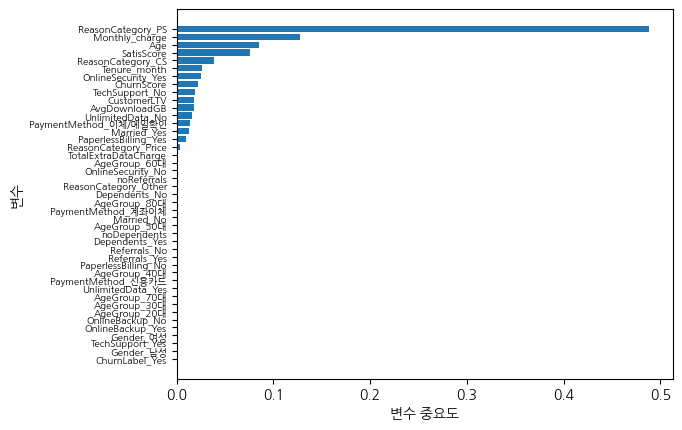

In [15]:
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize = 7)
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# VF를 위한 `RF`

In [16]:
rf_uncustomized = RandomForestClassifier(random_state = 42)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.700


In [17]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
#n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
para_split = [n_split * 2 for n_split in range(2,21)]
para_depth = [depth for depth in range(1, 11)]

In [18]:
rf_test = RandomForestClassifier(random_state = 42, max_depth = 6)
rf_test.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_test.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_test.score(df_test_x, df_test_y)))

Score on training set: 0.775
Score on test set: 0.725


In [19]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_test.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
41,ReasonCategory_PS,0.315
42,ReasonCategory_Price,0.099
40,ReasonCategory_Other,0.070
9,Monthly_charge,0.060
6,SatisScore,0.054
3,AvgDownloadGB,0.048
39,ReasonCategory_CS,0.043
8,Tenure_month,0.038
5,CustomerLTV,0.037
4,ChurnScore,0.034


Text(0, 0.5, '변수')

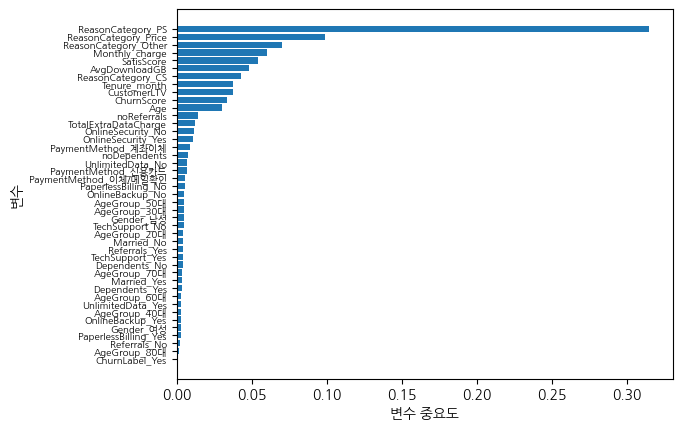

In [20]:
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize = 7)
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# VF를 위한 `GB`

In [21]:
#모델 생성: GradientBoostingClassifier
gb_uncustomized = GradientBoostingClassifier(random_state = 42)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.861
Score on test set: 0.686


In [22]:
gb_test = GradientBoostingClassifier(random_state = 42, max_depth = 6)
gb_test.fit(df_train_x, df_train_y)

#Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_test.score(df_train_x, df_train_y)))
#Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_test.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.684


In [23]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_test.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
41,ReasonCategory_PS,0.259
9,Monthly_charge,0.147
5,CustomerLTV,0.103
0,Age,0.080
3,AvgDownloadGB,0.072
4,ChurnScore,0.065
8,Tenure_month,0.065
6,SatisScore,0.049
39,ReasonCategory_CS,0.021
2,noReferrals,0.017


Text(0, 0.5, '변수')

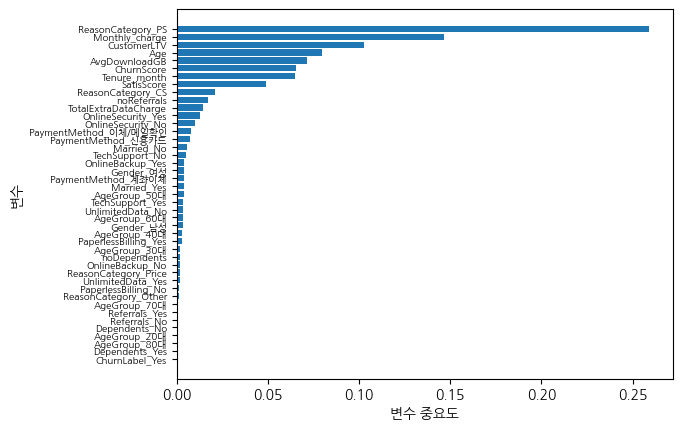

In [24]:
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize = 7)
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# VF 최종 변수

- 최종 쓸 변수 (RF)
ReasonCategory_PS,	Monthly_charge 	,Age,	SatisScore , Tenure_month , CustomerLTV,  AvgDownloadGB 

# 새롭게 산출된 Data

In [25]:
df_raw_fincp = pd.DataFrame()

최종 데이터

In [26]:
df_raw_fincp['AvgDownloadGB'] = df_raw_cp['AvgDownloadGB']
df_raw_fincp['CustomerLTV'] = df_raw_cp['CustomerLTV']
df_raw_fincp['Tenure_month'] = df_raw_cp['Tenure_month']
df_raw_fincp['ReasonCategory'] = df_raw_cp['ReasonCategory'] #PS
df_raw_fincp['Monthly_charge'] = df_raw_cp['Monthly_charge']
df_raw_fincp['Age'] = df_raw_cp['Age']
df_raw_fincp['SatisScore'] = df_raw_cp['SatisScore']

df_raw_fincp['Competitor'] = df_raw_cp['Competitor']

df_raw_fincp

,AvgDownloadGB,CustomerLTV,Tenure_month,ReasonCategory,Monthly_charge,Age,SatisScore,Competitor
0,30,4479,5,Price,98180.000000,50,1,0.0
1,4,3714,14,PS,112742.857143,78,1,0.0
2,11,3464,4,PS,94500.000000,75,1,0.0
3,17,2654,46,PS,73113.043478,79,1,0.0
4,9,5437,2,PS,27800.000000,67,3,1.0
...,...,...,...,...,...,...,...,...
1696,7,4317,22,PS,113254.545455,79,1,0.0
1697,13,3723,10,PS,97190.000000,73,1,0.0
1698,9,5773,2,PS,77550.000000,53,1,1.0
1699,0,5822,5,PS,23660.000000,36,1,1.0


In [27]:
#get dummy
df_raw_fincp_dummy = pd.get_dummies(df_raw_fincp)

## 최종 DT, RF, GB에 쓸 데이터 -> df_raw_fincp_dummy

In [28]:
df_raw_fincp_dummy

,AvgDownloadGB,CustomerLTV,Tenure_month,Monthly_charge,Age,SatisScore,Competitor,ReasonCategory_CS,ReasonCategory_Other,ReasonCategory_PS,ReasonCategory_Price
0,30,4479,5,98180.000000,50,1,0.0,0,0,0,1
1,4,3714,14,112742.857143,78,1,0.0,0,0,1,0
2,11,3464,4,94500.000000,75,1,0.0,0,0,1,0
3,17,2654,46,73113.043478,79,1,0.0,0,0,1,0
4,9,5437,2,27800.000000,67,3,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1696,7,4317,22,113254.545455,79,1,0.0,0,0,1,0
1697,13,3723,10,97190.000000,73,1,0.0,0,0,1,0
1698,9,5773,2,77550.000000,53,1,1.0,0,0,1,0
1699,0,5822,5,23660.000000,36,1,1.0,0,0,1,0


## data split

In [29]:
#더미화한 변수를 train set과 test set으로 분리한다
df_raw_fincp_x = df_raw_fincp_dummy.drop(["Competitor"], axis = 1, inplace = False) #목표변수 외
df_raw_fincp_y = df_raw_fincp_dummy["Competitor"] #목표변수

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_fincp_x, df_raw_fincp_y, test_size = 0.4, random_state = 42)
df_train, df_test = train_test_split(df_raw_fincp_dummy, test_size = 0.4, random_state = 42)
print("분할 전 설명변수 데이터 :", df_raw_fincp_x.shape)
print("분할 후 설명변수 데이터 :", df_train_x.shape, "\n Test", df_test_x.shape)

# 선형회귀 돌리고 나온 데이터

분할 전 설명변수 데이터 : (1701, 10)
분할 후 설명변수 데이터 : (1020, 10) 
 Test (681, 10)


# 분류

# 의사결정나무

In [30]:
dt_uncustomized = RandomForestClassifier(random_state = 42)
dt_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(dt_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(dt_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.695


In [31]:
#train 및 설명력 결과 저장
train_score = []
test_score = []

#param 지정을 위한 범위
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]
para_split = [n_split * 2 for n_split in range(2, 20)]
para_depth = [depth for depth in range(1, 11)]


## Grid SearchCV

In [32]:
estimator = DecisionTreeClassifier(random_state = 42)
#구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
#설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeClassifier(max_depth=4, min_samples_leaf=19, min_samples_split=4,
                       random_state=42)

best parameter:
{'max_depth': 4, 'min_samples_leaf': 19, 'min_samples_split': 4}

best score:
-0.102


In [32]:
#분리 노드의 최소 자료수
v_feature_name = df_train_x.columns

tree_final = DecisionTreeClassifier(random_state = 42, \
                                   max_depth = 4, \
                                   min_samples_leaf = 19, \
                                   min_samples_split = 4)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=19, min_samples_split=4,
                       random_state=42)

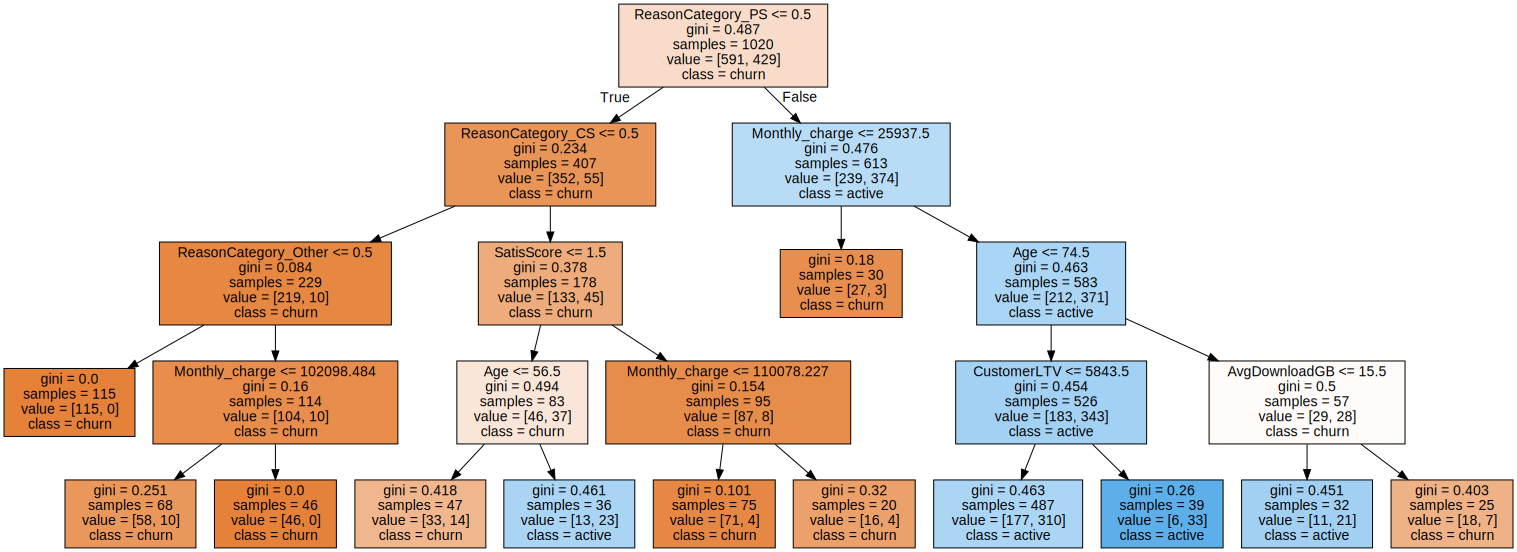

In [33]:
# 트리 모델을 tree_final.dot 파일로 저장 
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["churn", "active"],
                feature_names = v_feature_name, impurity = True, filled = True)
# graphviz를 이용해 트리 모델 시각화
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [34]:
#train data 설명력
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
#test data 설명력
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.756
Score on test set: 0.709


# RandomForest

In [35]:
rf_uncustomized = RandomForestClassifier(random_state = 42)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.695


In [36]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
#n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
para_split = [n_split * 2 for n_split in range(2,21)]
para_depth = [depth for depth in range(1, 11)]

## Grid Search

In [38]:
estimator = RandomForestClassifier(random_state = 42)
#구하고자 하는 parameter와 범위
param_grid = {"n_estimators": para_n_tree ,"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
#설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
RandomForestClassifier(max_depth=8, min_samples_leaf=12, min_samples_split=4,
                       n_estimators=10, random_state=42)

best parameter:
{'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 4, 'n_estimators': 10}

best score:
-0.058


## 최종모델

In [37]:
rf_final = RandomForestClassifier(random_state = 42, n_estimators = 10, min_samples_leaf = 12,
                                 min_samples_split = 4, max_depth = 8)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.773
Score on test set: 0.703


## 시각화

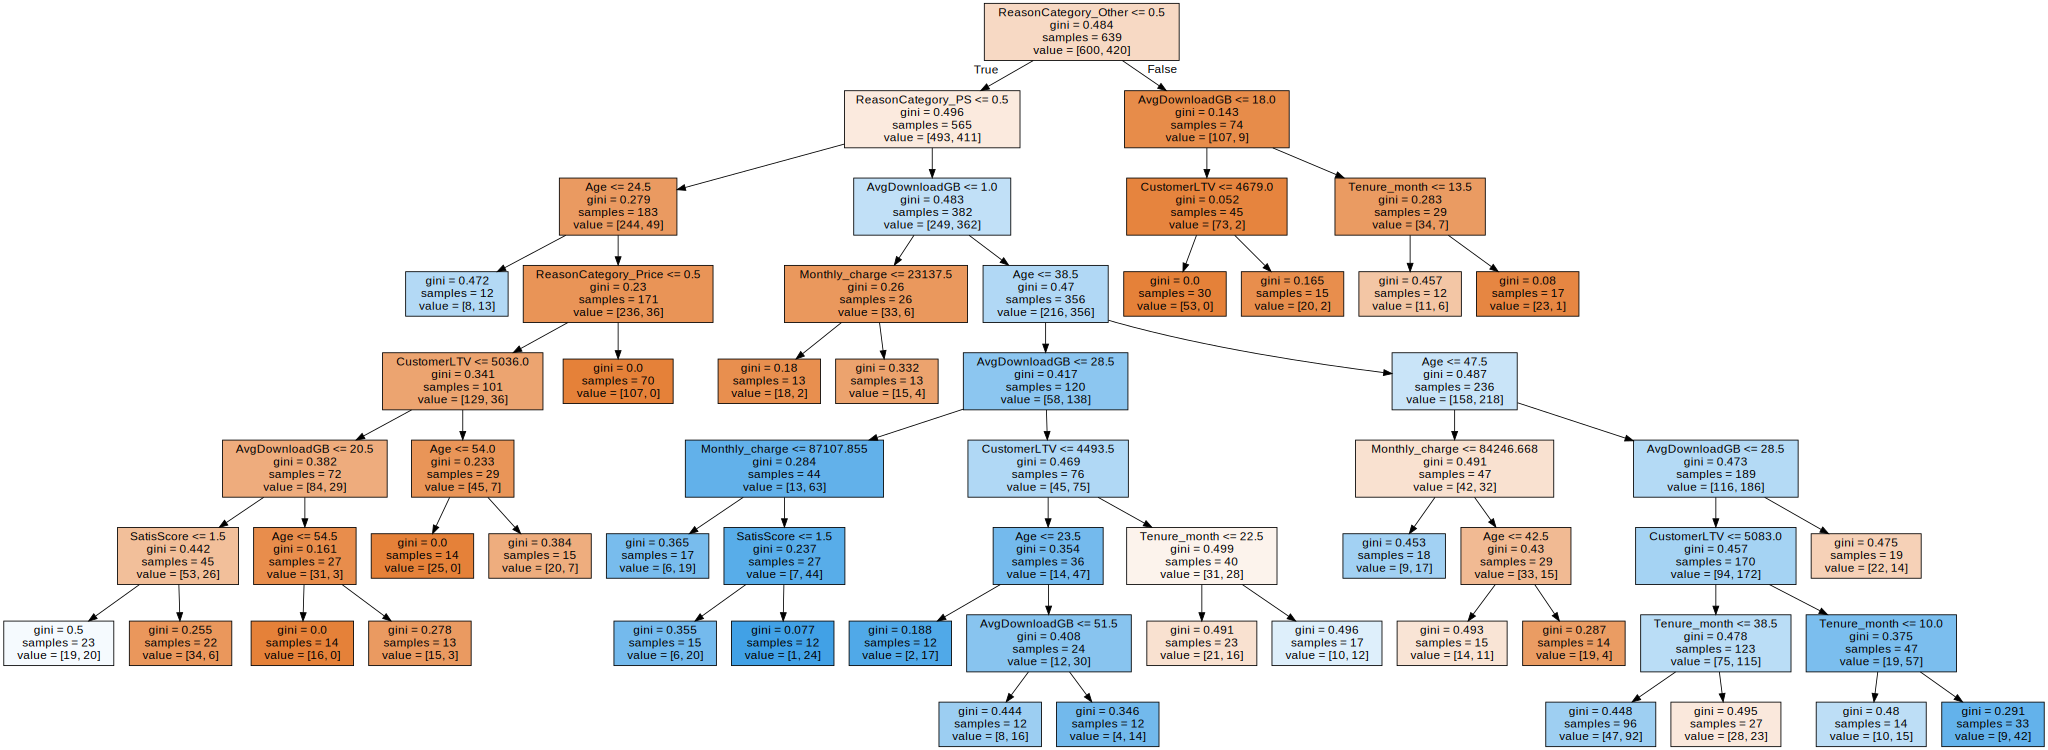

In [38]:
#변수명 저장
v_feature_name = df_train_x.columns

# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final_0.dot 그리기
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 중요도

In [39]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,ReasonCategory_PS,0.343
9,ReasonCategory_Price,0.144
3,Monthly_charge,0.095
7,ReasonCategory_Other,0.086
0,AvgDownloadGB,0.074
4,Age,0.065
5,SatisScore,0.062
1,CustomerLTV,0.053
2,Tenure_month,0.044
6,ReasonCategory_CS,0.034


Text(0, 0.5, '변수')

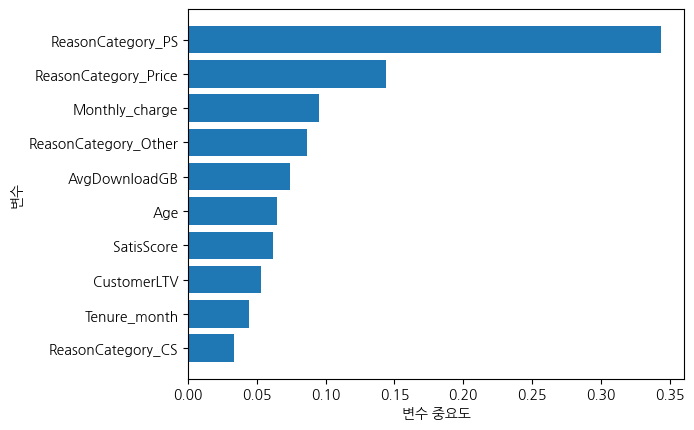

In [40]:
#설명변수 중요도 그래프 149 ~ 150p
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# Gradient Boost

In [41]:
#모델 생성: GradientBoostingClassifier
gb_uncustomized = GradientBoostingClassifier(random_state = 42)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.850
Score on test set: 0.680


In [43]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경 (10~100)
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]
para_split = [n_split * 2 for n_split in range(1, 21)]
para_depth = [depth for depth in range(1, 11)]
para_lr = [lr * 0.1 for lr in range(1, 10)]

## 최종모델

In [75]:
#모델 생성: GradientBoostingClassifier
gb_uncustomized = GradientBoostingClassifier(random_state = 42)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.850
Score on test set: 0.680


In [76]:
# n_estimatos  설정

train_score = []; test_score = []

para_n_tree = [n_tree *10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state = 42, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    

df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [77]:
# 모델 설명력 확인
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.742,0.720
1,20,0.742,0.718
2,30,0.754,0.712
3,40,0.784,0.705
4,50,0.799,0.698
5,60,0.808,0.690
6,70,0.818,0.689
7,80,0.830,0.687
8,90,0.839,0.687
9,100,0.850,0.680


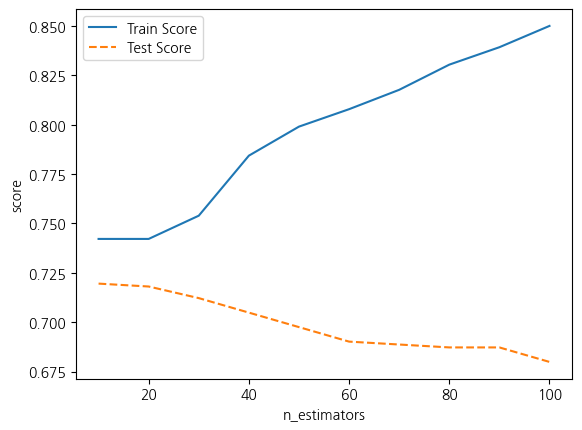

In [78]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [79]:
#편차가 가장 적은 지점인 n_estimatos=10 지점 선택 

In [80]:
#leaf 모델 성능을 비교

train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state = 42, n_estimators = 10, min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [81]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.742,0.720
1,2,0.742,0.720
2,3,0.742,0.720
3,4,0.740,0.718
4,5,0.740,0.720
5,6,0.740,0.720
6,7,0.740,0.720
7,8,0.740,0.720
8,9,0.740,0.720
9,10,0.740,0.720


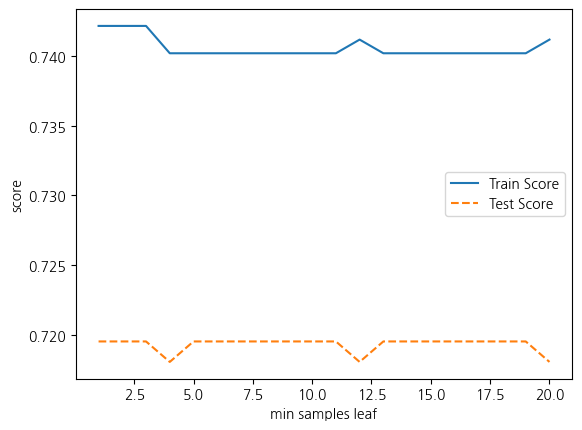

In [82]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [83]:
#편차가 가장 적은 leaf=9지점 선택
# min_sampels_split: 모델 성능을 비교

train_score = []; test_score = []

para_split = [n_split * 4 for n_split in range(1, 31)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state = 42, \
                                   n_estimators = 10, \
                                   min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [84]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.742,0.720
1,8,0.742,0.720
2,12,0.742,0.720
3,16,0.742,0.720
4,20,0.742,0.720
5,24,0.742,0.720
6,28,0.742,0.720
7,32,0.742,0.720
8,36,0.742,0.720
9,40,0.741,0.718


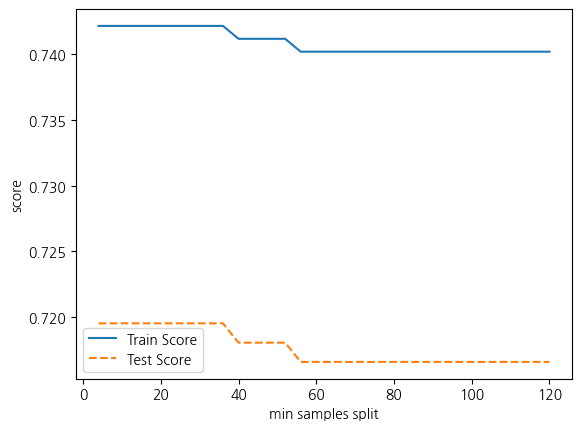

In [85]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [88]:
#max_depth 모델 성능을 비교한다

train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(random_state = 42, \
                                   n_estimators = 10, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
#결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [89]:
# 모델 설명력 확인
df_score_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.712,0.705
1,2,0.735,0.718
2,3,0.742,0.720
3,4,0.778,0.709
4,5,0.807,0.721
5,6,0.860,0.700
6,7,0.876,0.699
7,8,0.925,0.684
8,9,0.934,0.696
9,10,0.958,0.684


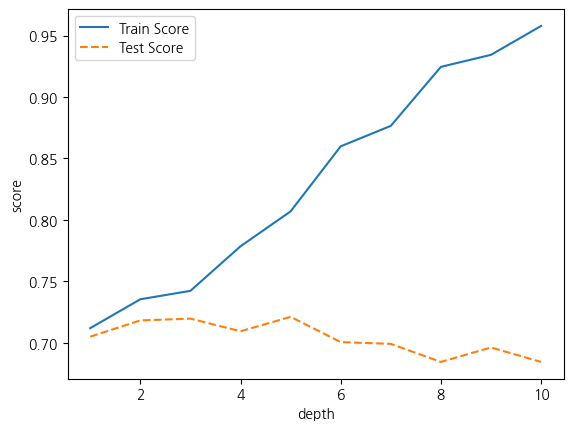

In [90]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

In [60]:
#편차가 가장 적은 지점인 depth=5 선택

In [91]:
#learnin_rate 모델 성능을 비교한다

train_score = []; test_score = []
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(n_estimators = 10, max_depth = 5, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
#결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

In [92]:
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.807,0.721
1,0.2,0.830,0.703
2,0.3,0.877,0.725
3,0.4,0.896,0.700
4,0.5,0.914,0.692
5,0.6,0.906,0.686
6,0.7,0.929,0.664
7,0.8,0.921,0.673
8,0.9,0.930,0.646


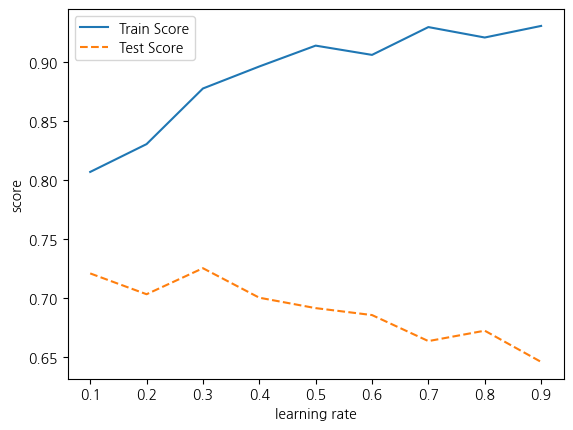

In [93]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

In [64]:
# 편차 적은 지점 0.3픽

In [94]:
#최종 모델을 생성한다
gb_final = GradientBoostingClassifier(random_state = 42, \
                                     n_estimators = 10, max_depth =5, learning_rate = 0.3)
gb_final.fit(df_train_x, df_train_y)


print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.877
Score on test set: 0.725


In [69]:
#Score on training set: 0.850
#Score on test set: 0.680
#에서

In [70]:
v_feature_name = df_train_x.columns


df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,ReasonCategory_PS,0.620
3,Monthly_charge,0.109
5,SatisScore,0.085
6,ReasonCategory_CS,0.049
4,Age,0.040
1,CustomerLTV,0.040
2,Tenure_month,0.028
0,AvgDownloadGB,0.019
9,ReasonCategory_Price,0.008
7,ReasonCategory_Other,0.002


Text(0, 0.5, '변수')

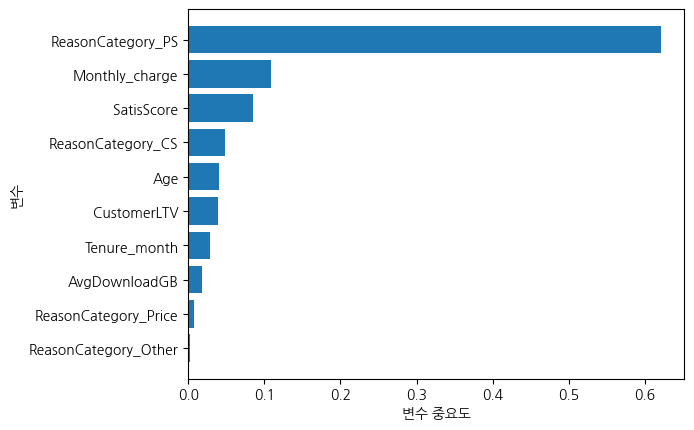

In [71]:
#중요도 높은 변수 확인
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 최종 모델 평가

In [95]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting']

#최종 set 별 정확도 비교를 위한 list
train_accuracy = []
test_accuracy = []
# 정확도 비교를 위한 list
model_auc=[]
# auc score 비교를 위한 list
model_precision = []
model_recall = []
# f1 score 비교를 위한 list
model_f1_score = []

In [96]:
# 모델생성 'max_depth': 4, 'min_samples_leaf': 19, 'min_samples_split': 4
dt_model = DecisionTreeClassifier(max_depth = 4,\
                                  min_samples_leaf = 19,\
                                  min_samples_split =  4,\
                                  random_state = 42)
dt_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

In [97]:
# 예측값
y_pred = dt_model.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)),'\n')
print(classification_report(df_test_y, y_pred, digits = 3))

# roc_curve 예측값
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc예측값
model_auc.append(roc_auc)

Confusion matrix: 
[[243 145]
 [ 53 240]] 

              precision    recall  f1-score   support

         0.0      0.821     0.626     0.711       388
         1.0      0.623     0.819     0.708       293

    accuracy                          0.709       681
   macro avg      0.722     0.723     0.709       681
weighted avg      0.736     0.709     0.709       681



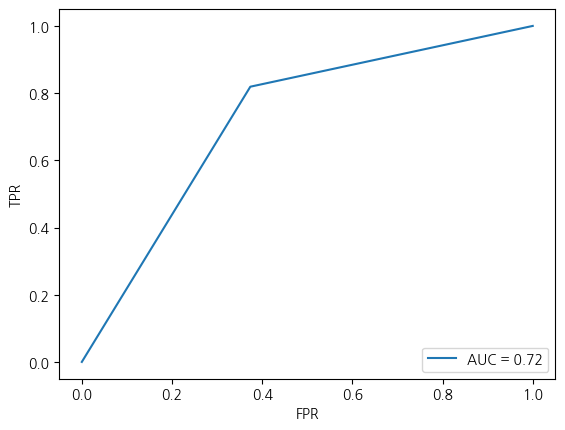

In [98]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [99]:
# precision recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [100]:
# 랜덤포레스트
#'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 4, 'n_estimators': 10
rf_model = RandomForestClassifier(min_samples_split = 4,\
                                  max_depth = 8,\
                                  min_samples_leaf =  12,\
                                  n_estimators = 10, random_state = 42)

rf_model.fit(df_train_x, df_train_y)
# train 정확도
train_accuracy.append(rf_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

In [101]:
# 예측값
y_pred = rf_model.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)),'\n')
print(classification_report(df_test_y, y_pred, digits=3))

# roc_curve 예측값
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc예측값
model_auc.append(roc_auc)

Confusion matrix: 
[[241 147]
 [ 55 238]] 

              precision    recall  f1-score   support

         0.0      0.814     0.621     0.705       388
         1.0      0.618     0.812     0.702       293

    accuracy                          0.703       681
   macro avg      0.716     0.717     0.703       681
weighted avg      0.730     0.703     0.704       681



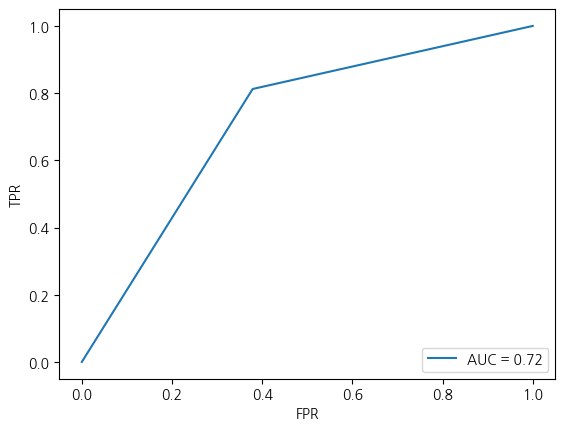

In [102]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [103]:
# precision recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [104]:
#  n_estimators = 10, max_depth =5, learning_rate = 0.3)

gb_final = GradientBoostingClassifier(max_depth = 5, n_estimators = 10,\
                                      learning_rate = 0.3, random_state = 42)
gb_final.fit(df_train_x, df_train_y)
# train 정확도
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

In [105]:
# 예측값
y_pred = gb_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)),'\n')
print(classification_report(df_test_y, y_pred, digits=3))

# roc_curve 예측값
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc예측값
model_auc.append(roc_auc)

Confusion matrix: 
[[271 117]
 [ 70 223]] 

              precision    recall  f1-score   support

         0.0      0.795     0.698     0.743       388
         1.0      0.656     0.761     0.705       293

    accuracy                          0.725       681
   macro avg      0.725     0.730     0.724       681
weighted avg      0.735     0.725     0.727       681



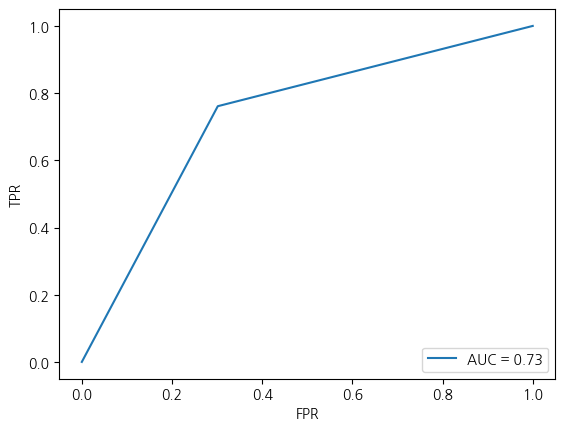

In [106]:
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [107]:
# precision recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [108]:
df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy

df_eval['AUC'] = model_auc
df_eval['Precision'] = model_precision
df_eval['Recall'] = model_recall
df_eval['F1Score'] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.756,0.709,0.723,0.623,0.819,0.708
RandomForest,0.773,0.703,0.717,0.618,0.812,0.702
GradientBoosting,0.877,0.725,0.730,0.656,0.761,0.705


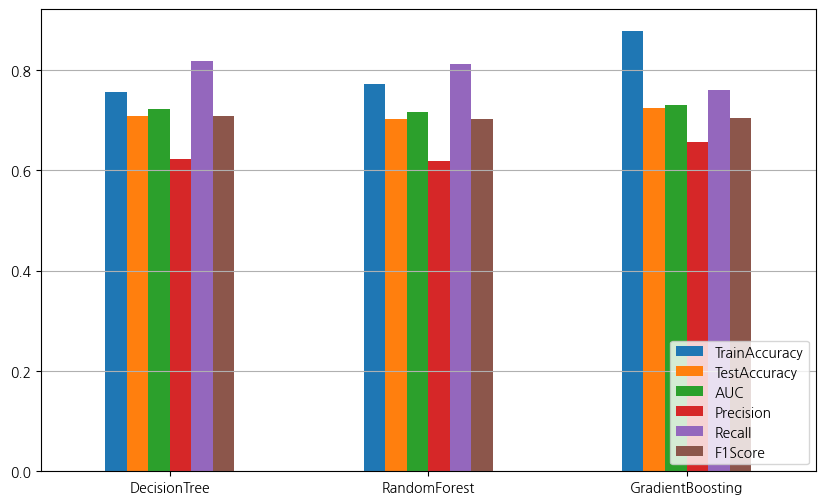

In [109]:
df_eval.plot.bar(rot=0,figsize=(10,6))
plt.legend(loc='lower right')
plt.grid(axis='y')